##  Python port of code and figures from the book:

# An Introduction to Bayesian Data Analysis for Cognitive Science  
####  https://vasishth.github.io/bayescogsci/book/
## Chapter 1.
## @ Jozsef Arato, University of Vienna 
jozsef.arato@unvie.ac.at

### import python libraries

In [239]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd
import xarray as xa

 set printing precision

In [363]:
%precision 3  

'%.3f'

## 1.4  Discrete random variables: An example using the binomial distribution

In [9]:
np.random.binomial(n=10,p=.5,size=20)  # size and n seem to mean the oppposite of how it is in the R

array([6, 6, 4, 4, 4, 7, 5, 5, 5, 6, 5, 5, 5, 4, 3, 4, 4, 5, 4, 3])

### Figure 1.2:  Probability mass functions of a binomial distribution assuming 10 trials, with 50%, 10%, and 90% probability of success.

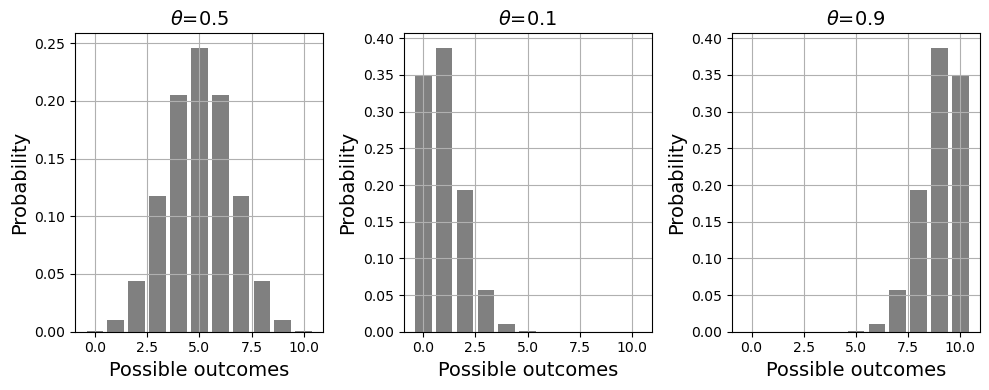

In [25]:
N=10
thetas=[.5,.1,.9]
fig,ax=plt.subplots(ncols=3,figsize=(10,4))
x=np.arange(0,N+1)
for ct,thet in enumerate(thetas):
    ax[ct].bar(x,stats.binom.pmf(x,N,thet),color='gray')
    ax[ct].set_xlabel('Possible outcomes',fontsize=14)
    ax[ct].set_ylabel('Probability',fontsize=14)
    ax[ct].set_title(f"$\\theta$={thet}",fontsize=14)
    ax[ct].grid('ON')

plt.tight_layout()

#### FIGURE 1.3
The likelihood function for 7 successes out of 10.

In [34]:
nest=50  # number of points uded to estimate the curve
thetas=np.linspace(0,1,nest)  
K=7
N=10
likelihood=stats.binom.pmf(k=K,n=N,p=thetas)


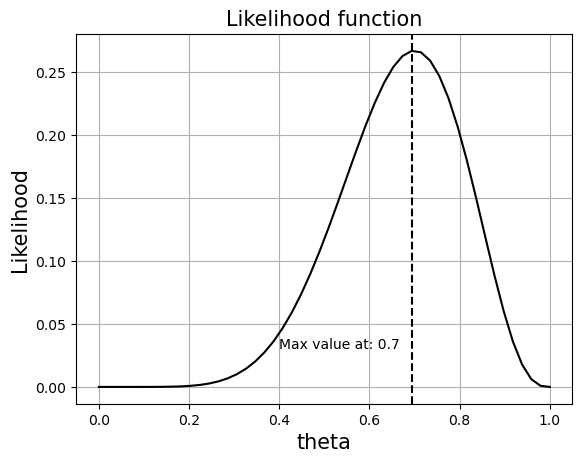

In [364]:
fig,ax=plt.subplots()
ax.plot(thetas,likelihood,color='k')
ax.axvline(thetas[np.argmax(likelihood)],color='k',linestyle='--')
ax.text(.4,.03,f'Max value at: {np.round(thetas[np.argmax(likelihood)],1)}')
ax.set_xlabel('theta',fontsize=15)
ax.set_ylabel('Likelihood',fontsize=15)
ax.set_title('Likelihood function',fontsize=15)

ax.grid('ON')


#### FIGURE 1.4 
The plot shows the estimate of the mean proportion of successes sampled from a binomial distribution with true probability of success 0.7, with increasing sample sizes. As the sample size increases, the estimate converges to the true value of 0.7.

In [88]:
theta=.7
ns=np.int32(np.logspace(1,5,300))
ks=np.random.binomial(n=ns,p=theta)


Text(0.5, 1.0, 'The MLE as a function of sample size')

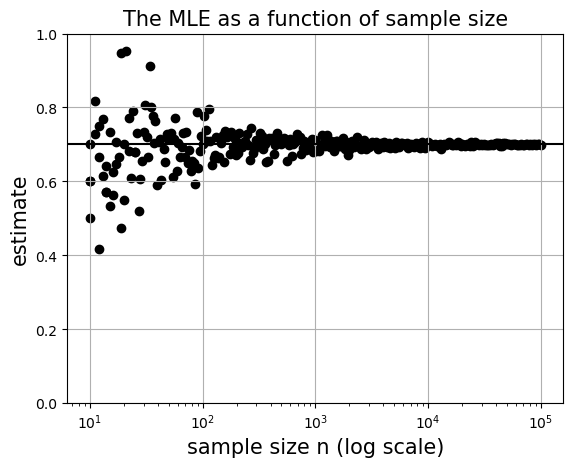

In [90]:
fig,ax=plt.subplots()
ax.set_xscale('log')
ax.scatter(ns,ks/ns,color='k')
ax.axhline(theta,color='k')
ax.set_ylim([0,1])
ax.grid('ON')
ax.set_xlabel('sample size n (log scale)',fontsize=15)
ax.set_ylabel('estimate',fontsize=15)
ax.set_title('The MLE as a function of sample size',fontsize=15)


#### 1.4.2.1 Compute the probability of a particular outcome (discrete case only)


In [200]:
stats.binom.pmf(k=5,n=10,p=.5)

0.246

In [204]:
stats.binom.pmf(k=5,n=10,p=[.1,.9])

array([0.0015, 0.0015])

#### 1.4.2.2 Compute the cumulative probability of k or less (more) than k successes



In [107]:
ks=[0,1,2]
cumprob=0
for k in ks:
    cumprob+=stats.binom.pmf(k=k,n=10,p=.5)
print(np.round(cumprob,4))

0.0547


In [198]:
stats.binom.cdf(2,10,p=.5)

0.055

In [110]:
stats.binom.sf(2,10,p=.5)

0.9453125

 ### FIGURE 1.5
 The cumulative distribution function for a binomial distribution assuming 10 trials, with 50% probability of success

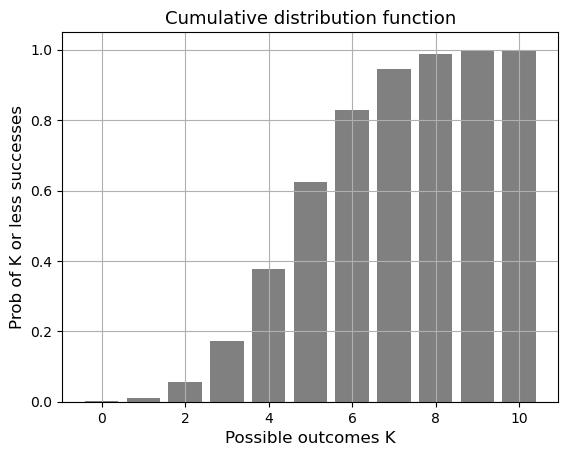

In [119]:
x=np.arange(0,N+1)
fig,ax=plt.subplots()
ax.bar(x,stats.binom.cdf(x,10,p=.5),color='gray')
ax.set_xlabel('Possible outcomes K',fontsize=12)
ax.set_ylabel('Prob of K or less successes',fontsize=12)
ax.set_title('Cumulative distribution function',fontsize=13)
ax.grid('ON')


#### 1.4.2.3 
Compute the inverse of the cumulative distribution function (the quantile function)

In [197]:
stats.binom.ppf(.37,10,p=.5)

4.000

FIGURE 1.6: The inverse CDF for the binomial(size=10,prob=0.5).

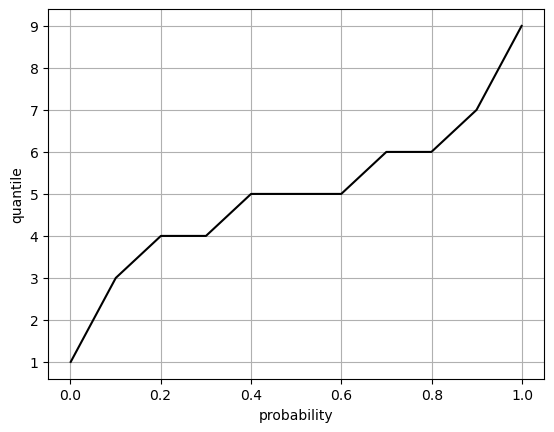

In [143]:
ps=np.linspace(0.001,.999,11)
fig,ax=plt.subplots()
ax.plot(ps,stats.binom.ppf(ps,10,p=.5),color='k')
ax.set_xlabel('probability')
ax.set_ylabel('quantile')
ax.grid('ON')


In [130]:
stats.binom.ppf(ps,10,p=.5)

array([1., 3., 4., 4., 5., 5., 5., 6., 6., 7., 9.])

### 1.4.2.4 Generate simulated data from a Binomial distribtion

In [137]:
np.random.binomial(n=10,p=.5)

5

In [142]:
stats.bernoulli(p=.5).rvs(10)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [139]:
np.random.binomial(1,.5,size=10)   

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0])

## 1.5 Continuous random variables: An example using the normal distribution

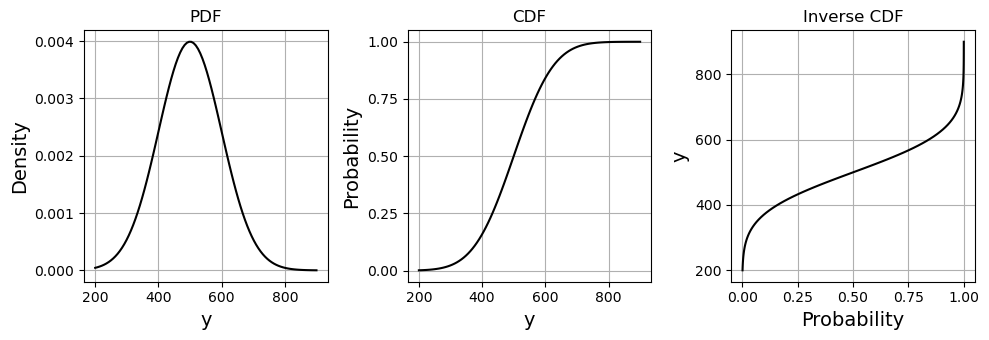

In [180]:
fig,ax=plt.subplots(ncols=3,figsize=(10,3.5))

y=np.linspace(200,900,100)

ax[0].plot(y,stats.norm.pdf(y,loc=500,scale=100),color='k')
ax[0].set_title('PDF')
ax[0].set_ylabel('Density',fontsize=14)
ax[0].set_xlabel('y',fontsize=14)

ps=stats.norm.cdf(y,loc=500,scale=100)
ax[1].plot(y,ps,color='k')
ax[1].set_title('CDF')
ax[1].set_ylabel('Probability',fontsize=14)
ax[1].set_xlabel('y',fontsize=14)

ax[2].plot(ps,stats.norm.ppf(ps,loc=500,scale=100),color='k')
ax[2].set_title('Inverse CDF')
ax[2].set_ylabel('y',fontsize=14)
ax[2].set_xlabel('Probability',fontsize=14)

for axi in ax:
    axi.locator_params(axis='both', nbins=5)
    axi.grid('ON')

plt.tight_layout()

In [206]:
stats.norm.cdf(700,loc=500,scale=100)-stats.norm.cdf(200,loc=500,scale=100)

0.9759

In [205]:
stats.norm.ppf(.975,loc=500,scale=100)

695.9964

In [208]:
y=stats.norm(500,100).rvs(10)
np.mean(y)

493.2076

In [209]:
np.std(y)

61.2378

In [211]:
np.quantile(y,[.05,.975])

array([396.4397, 561.6754])

In [212]:
stats.norm.pdf(2,loc=0,scale=1)

0.0540

In [215]:
stats.norm.cdf(2)-stats.norm.cdf(-2)  # for standard normal, we do not need to specify the mean (loc), and sd(scale)



0.9545

In [217]:
stats.binom.pmf(2,10,.5)

0.0439

In [218]:
stats.binom.cdf(2,10,.5)-stats.binom.cdf(1,10,.5)

0.0439

### 1.5.2 Truncating a normal distribution

In [221]:
stats.norm.sf(0)


0.5000

In [222]:
1-stats.norm.cdf(0)

0.5000

In [223]:
stats.norm.cdf(0)

0.5000

## 1.6 Bivariate and multivariate distributions

In [228]:
discreteDat=pd.read_csv('Data\\df_discreteagrmt.csv')

In [234]:
discreteDat

,Unnamed: 0,item,subj,attractor,interference,rating,accuracy,Sentence
0,1,10,1510574143_b07f6c0777674bc3e32d6128e4e1f5f9,match,interference,7,0,The_interpreter of_the ambassador noticeably s...
1,2,10,1510579410_7060270d2bcceaf6dd9a13ef9776c784,match,interference,6,0,The_interpreter of_the ambassador noticeably s...
2,3,10,1510580312_73cbdc9b3b9c5938910a0fdb52a8f3d6,match,interference,3,1,The_interpreter of_the ambassador noticeably s...
3,4,10,1510581869_9d2732d9d0aea60fa6658f6df48ce0ea,match,interference,5,1,The_interpreter of_the ambassador noticeably s...
4,5,10,1510582724_9819f7f8bedef2f7112a1f38e9e5f3ee,match,interference,5,1,The_interpreter of_the ambassador noticeably s...
...,...,...,...,...,...,...,...,...
4291,4292,9,1510772657_b57c1ab4b8e6017fc54709d94a038ac6,mismatch,no interference,5,0,The_fan of_the board games still dreams_of an_...
4292,4293,9,1510776778_6e1f3fb7a766c1c21a7b8ca5ab089a6c,mismatch,no interference,7,1,The_fan of_the board games still dreams_of an_...
4293,4294,9,1510779096_d338362b63acce1a3550133dfb5351d9,mismatch,no interference,4,1,The_fan of_the board games still dreams_of an_...
4294,4295,9,1510781908_85a226dd009a735479725d874f4893eb,mismatch,no interference,4,1,The_fan of_the board games still dreams_of an_...


In [236]:
LikertVals=np.unique(discreteDat['rating'])
Accuracies=np.unique(discreteDat['accuracy'])

MargCounts=np.zeros((len(Accuracies),len(LikertVals)))
for cv,v in enumerate(LikertVals):
    for ca,a in enumerate(Accuracies):
        MargCounts[ca,cv]=np.sum(discreteDat['accuracy'][discreteDat['rating']==v]==a)
        

#### table 1.1

In [244]:
JointPMF=MargCounts/np.sum(MargCounts)
JointPMF

array([[0.0179, 0.0233, 0.04  , 0.0431, 0.0633, 0.0489, 0.0549],
       [0.0312, 0.0533, 0.0857, 0.0964, 0.1469, 0.1532, 0.142 ]])

In [258]:
PMFarray=xa.DataArray(data=JointPMF,dims=['accuracy','rating'],coords=[Accuracies,LikertVals])

#### Figure 1.8

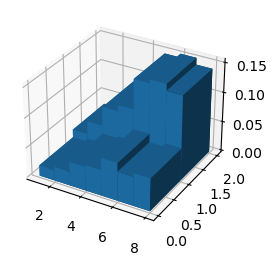

In [257]:
fig=plt.figure()
ax1 = fig.add_subplot(121, projection='3d')

xx,yy=np.meshgrid(LikertVals,Accuracies)
xx=np.ravel(xx)
yy=np.ravel(yy)

width = depth = 1
bottom=np.zeros_like(yy)
ax1.bar3d(xx, yy, bottom, width, depth, JointPMF.ravel(), shade=True)


In [261]:
PMFarray.sum('rating')

<xarray.DataArray (accuracy: 2)>
array([0.2914, 0.7086])
Coordinates:
  * accuracy  (accuracy) int64 0 1

In [262]:
np.sum(JointPMF,1)

array([0.2914, 0.7086])

In [263]:
PMFarray.sum('accuracy')

<xarray.DataArray (rating: 7)>
array([0.0491, 0.0766, 0.1257, 0.1394, 0.2102, 0.202 , 0.1969])
Coordinates:
  * rating   (rating) int64 1 2 3 4 5 6 7

In [264]:
np.sum(JointPMF,0)

array([0.0491, 0.0766, 0.1257, 0.1394, 0.2102, 0.202 , 0.1969])

#### FIGURE 1.9: The marginal distributions of the random variables X and Y, presented as barplots.

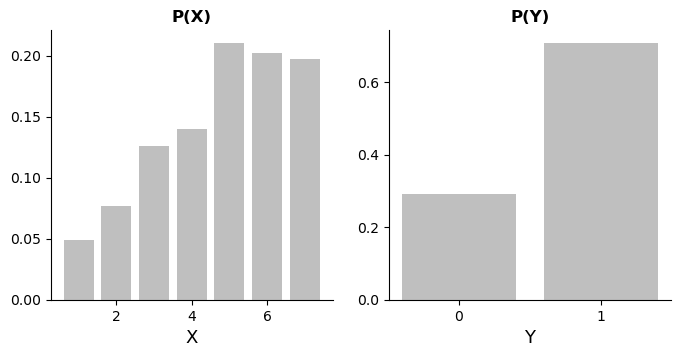

In [285]:

Names=['X','Y']
fig,ax=plt.subplots(ncols=2,figsize=(8,3.5))
ax[0].bar(LikertVals,PMFarray.sum('accuracy'),color='gray',alpha=.5)
ax[1].bar(Accuracies,PMFarray.sum('rating'),color='gray',alpha=.5)
ax[1].set_xticks([0,1])


for c,axi in enumerate(ax):
    axi.locator_params(axis='both', nbins=5)
    axi.spines['top'].set_visible(False)
    axi.spines['right'].set_visible(False)
    axi.set_title(f'P({Names[c]})',weight='bold')
    axi.set_xlabel(Names[c],fontsize=13)



In [328]:




x, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.dstack((x, y))

In [329]:

mu = np.array([0, 0])  # Mean
cov = np.array([[1, 0], [0, 1]])  # Covariance matrix
mvdistr=stats.multivariate_normal(mu,cov)

In [324]:
def Vis3ds(distr,positions):
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax=fig.add_subplot(2, 2, 1)

    ax.contourf(x, y, distr.pdf(positions), levels=10, cmap='GnBu')
    ax=fig.add_subplot(2, 2, 2, projection='3d')
    ax.plot_surface(x, y, distr.pdf(positions), rstride=10, cstride=10, antialiased=False,cmap='coolwarm')

    ax=fig.add_subplot(2, 2, 3)
    ax.contourf(x, y, distr.cdf(positions), levels=10, cmap='GnBu')

    ax=fig.add_subplot(2, 2, 4, projection='3d')
    ax.plot_surface(x, y, distr.cdf(positions), rstride=10, cstride=10, antialiased=False,cmap='coolwarm')
    #plt.colorbar(label='Probability Density')


#### Figure 1.10

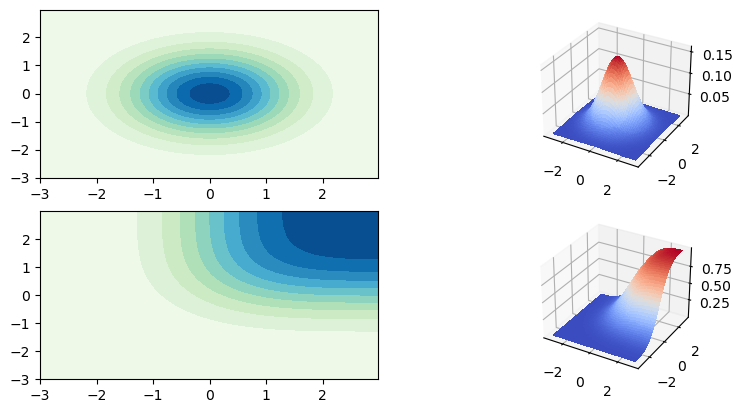

In [325]:
Vis3ds(mvdistr,pos)

In [330]:
mu = np.array([0, 0])  # Mean
cov = np.array([[1, -0.5], [-0.5, 1]])  # Covariance matrix


mvdistr=stats.multivariate_normal(mu,cov)

#### Figure 1.11

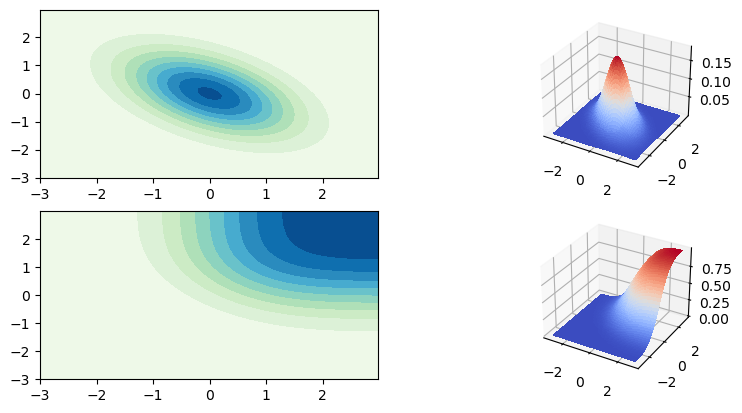

In [331]:
Vis3ds(mvdistr,pos)

In [332]:

mu = np.array([0, 0])  # Mean
cov = np.array([[1, 0.5], [0.5, 1]])  # Covariance matrix

mvdistr=stats.multivariate_normal(mu,cov)

#### Figure 1.12

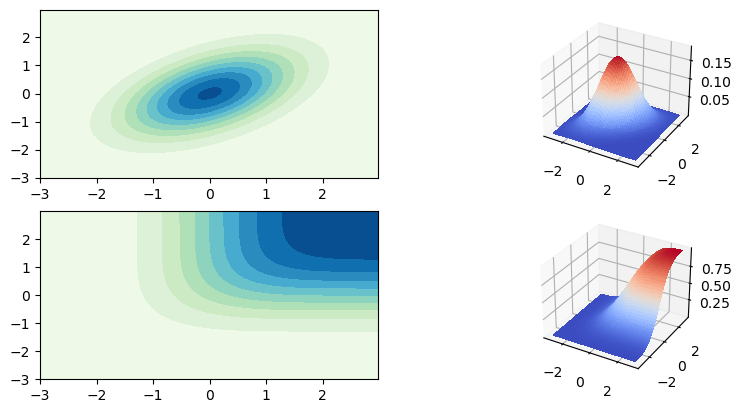

In [327]:
Vis3ds(mvdistr,pos)

 ### 1.6.3 Generate simulated bivariate (multivariate) data

In [343]:
mu = np.array([0, 0])  # Mean
Sigma  = np.array([[5**2,5 * 10 * .6 ], [5 * 10 * .6, 10**2]])  # Covariance matrix
mvdistr=stats.multivariate_normal(mu,Sigma)


In [344]:
u=mvdistr.rvs(100)

print(u[:3,:])

[[-11.3223 -21.5717]
 [ -3.6134 -18.8796]
 [  2.9697  13.3518]]


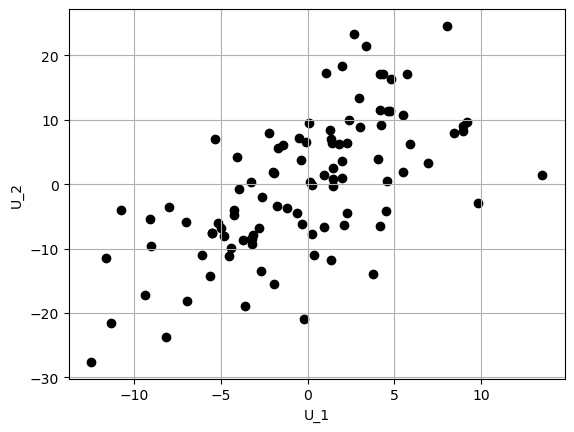

In [345]:
fig,ax=plt.subplots()
ax.scatter(u[:,0],u[:,1],color='k')
ax.set_xlabel('U_1')
ax.set_ylabel('U_2')

ax.grid()

In [361]:
sds=np.sqrt(np.diag(Sigma))   # get the SD-s from the covariance matrix
print(sds)

[ 5. 10.]


diagonal matrix with the SD-s

In [359]:
sd_diag=np.diag(sds)
print(sd_diag)

[[ 5.  0.]
 [ 0. 10.]]


make correlation matrix

In [355]:
Corrmat=np.eye(2)  # make an identity matrix
Corrmat[0,1]=Corrmat[1,0]=.6  #modify off diagonls, to get the desired correlation matrix
print(Corrmat)

[[1.  0.6]
 [0.6 1. ]]


 "One can reassemble the variance-covariance matrix by pre-multiplying and post-multiplying the correlation matrix with the diagonal matrix containing the standard deviations"

In [357]:
sd_diag @ Corrmat @ sd_diag

array([[ 25.,  30.],
       [ 30., 100.]])

### 1.7 An important concept: The marginal likelihood (integrating out a parameter)

In [377]:
from scipy import special,integrate
def BinLik(theta):
    return special.comb(10,7)*theta**7*(1-theta)**3
BinLik(.3)


0.009

In [378]:
result, error=integrate.quad(BinLik,0,1)
print(result)

0.09090909090909091
